# Homework Assignment 1

This homework assignment is concerned with the material from the first three weeks of classes. 

Store your assignment in your **mp248** repository.  Specifically, save the file as **mp248/Assignments/hwk.1.ipynb**.  You will receive automated feedback on your assignment in your Small Task 4. 

----

**P1:** This question is a variant on your lab 2b.  

Create a function **perm_lets(input_string)** that:

1. Takes as input a string, **input_string**. 
2. Returns a string.
3. The return string will have the same number of words as **input_string**, and the same letters as **input_string**, but the individual words can be of different length.  i.e. 

**perm_lets("try this") == "ist thry"**

is a valid return-value.  By "number of words" in a string ``X``, we mean the length of the list ``X.split(' ')``, i.e. one more than the number of blank spaces in the string.   A "word" means a string of letters with no spaces. Lastly,

4. Every vowel must be isolated, i.e. immediately beside vowels you have at most spaces and/or consonants.


In [1]:
import random as rd

In [2]:
vowel = ["a", "e", "i", "o", "u", "A", "E", "I", "O", "U"]
"A" in vowel

True

In [3]:
def vowel_check(L):
    """Check for consecutive vowel by looping through each element in string"""
    vowel = ["a", "e", "i", "o", "u", "A", "E", "I", "O", "U"]
    for i in range(len(L)):
        if (L[i] in vowel) and (L[i-1] in vowel) :
            return True
    return False    

In [4]:
## Testing vowel_check function ##
print(vowel_check("cb rsreoW notIHrrteeeouMnnd l"))
print(len("cb rsreoW notIHrrteeeouMnnd l"))
print(vowel_check("eeggaa"))
print(vowel_check("gggeeegggaaa"))
print(vowel_check("monster hunter world iceborne"))

True
29
True
True
False


In [5]:
def perm_lets(input_string):
    """
    Input: A string
    Return: A string, with all letters shuffled
    """
    L = ''.join(rd.sample(input_string, len(input_string)))
    
    ## Checking for double spaces in the list and
    ## Checking for spaces in first and last char
    ## Checking for consecutive vowel in the list
    ## Remake the list if any is true
    while ('  ' in L) or (L[0] == ' ') or (L[-1] == ' ') or (vowel_check(L) == True): 
        L = ''.join(rd.sample(input_string, len(input_string)))
    return(L)
    

In [6]:
perm_lets("Monster Hunter World Iceborne")

'onucerIltsn ebrHW detor eMron'

----

**P2:** Load the relevant data in the **Data/SW.dat** into a Python object using the **json** library.  Using that data, print out a list of:

(a) The five **shortest** characters in the Star Wars movies.  Print the data as a list of pairs **(name, height)**.    When printing your data, have it in increasing order (of heights).

(b) The five **tallest** characters in the Star Wars movies. Use the same conventions as (a).

(c) Print the five **heaviest** characters in the Star Wars movies.  Print the data as pairs **(name, weight)** in the order of increasing weight.

(d) The five **lightest** characters in the Star Wars movies.  Use the conventions of (c).

(e) Create a **matplotlib** plot of height vs. weight of the Star Wars characters.  i.e. on the x-axis plot the heights, and on the y-axis plot the weights.  As in the lecture notes, please use **%matplotlib inline** to ensure your plots are saved in your notebook.


In [7]:
import json 
import pprint as pp
import collections as co
import operator as op

Algorithm attempt: 
1. Extract names, heights, mass (assume weight = mass given the context)
2. Pair them together to spot the 'unknown' height entry
3. Kill that 'unknown' entry
4. Height and Mass are stored as string type, so convert them into int for sorting purpose
5. Unpair them, convert the height into int
6. "Repair" them again
7. Sort
8. ???
9. Profit

In [8]:
with open("../../mp248-course/Data/SW.dat/people.json") as f:
    ppdat = json.loads(f.read())

In [9]:
##pp.pprint(ppdat)

In [10]:
## attempt to 'extract' people's name and height from ppdat ##
ccDict = co.defaultdict(int)
people_name = [i['fields']['name'] for i in ppdat]
people_height = [i['fields']['height'] for i in ppdat]
people_mass = [i['fields']['mass'] for i in ppdat]

In [11]:
##print(people_name)
##print(people_height)
##print(type(people_height[0])) 
##print(people_mass)

[zip()](https://docs.python.org/3.3/library/functions.html#zip) function was not covered in lecture, but it was necessary for this solution.

In [12]:
## Attempt to pair two lists, element by element using zip() ##
## It can be difficult to sort zip type, so should be converted into list type first for easier sorting ## 
print(type(zip(people_name, people_height)))
list1 = list(zip(people_name, people_height))
list2 = list(zip(people_name, people_mass))

##pp.pprint(list1)
##pp.pprint(list2)

<class 'zip'>


In [13]:
def remove_unknown(list_u):
    '''
    There is a height 'unknown' in the list. Want to remove/filter that entry entirely 
    Input list_u: list with unknown entries
    Output new_list: list with unknown entries removed
    '''
    new_list = []
    for i in range(0, len(list_u)):
        if "unknown" not in list_u[i]:
            new_list.append(list_u[i])
    return new_list

list3 = remove_unknown(list1)
list4 = remove_unknown(list2)

In [14]:
def str_to_intlist (str_list):
    '''
    unzip the tuple into 2 separate lists to convert the height into int type for ease of sorting 
    then zip the two list again
    input str_list: list with numbers stored as str type
    output int_list: list with numbers stored as int, float 
    '''
    namelist, numlist = list(zip(*str_list))
    num_int_list = []
    for i in range(0, len(numlist)):
        if ',' in numlist[i]: ## kill str ',' to convert to float
            x = numlist[i].replace(',','')
            num_int_list.append(float(x))
        elif '.' in numlist[i]: ## convert to float if decimals are found 
            x = numlist[i]
            num_int_list.append(float(x))
        else:
            num_int_list.append(float(numlist[i]))
            
    ## zip the two list again ##
    int_list = list(zip(namelist, num_int_list))
    return int_list

list5 = str_to_intlist(list3)
list6 = str_to_intlist(list4)

In [15]:
## Sort list5, list6 by increasing order of height and weight resp., as in lecture notes ##
## list5 and list6 should now be sorted and we can use this to derive the answers##
list5 = sorted(list5, key=op.itemgetter(1))
list6 =  sorted(list6, key=op.itemgetter(1))
##pp.pprint(list5)
##pp.pprint(list6)

In [16]:
def first_five(l):
    '''Print out the first 5 elements in the sorted list, whether they're the shortest or lightest'''
    for i in range(5):
        pp.pprint(l[i])

In [17]:
def last_five(l):
    '''Print out the last 5 elements in the sorted list, whether they're tallest or heaviest '''
    for i in range(1,6):
        pp.pprint(l[-i])

#### Answer: ####
(a) The five **shortest** characters in the Star Wars movies.

In [18]:
first_five(list5)

('Yoda', 66.0)
('Ratts Tyerel', 79.0)
('Wicket Systri Warrick', 88.0)
('Dud Bolt', 94.0)
('R2-D2', 96.0)


(b) The five **tallest** characters in the Star Wars movies.

In [19]:
last_five(list5)

('Yarael Poof', 264.0)
('Tarfful', 234.0)
('Lama Su', 229.0)
('Chewbacca', 228.0)
('Roos Tarpals', 224.0)


(c) Print the five **heaviest** characters in the Star Wars movies.

In [20]:
last_five(list6)

('Jabba Desilijic Tiure', 1358.0)
('Grievous', 159.0)
('IG-88', 140.0)
('Tarfful', 136.0)
('Darth Vader', 136.0)


(d) The five **lightest** characters in the Star Wars movies.

In [21]:
first_five(list6)

('Ratts Tyerel', 15.0)
('Yoda', 17.0)
('Wicket Systri Warrick', 20.0)
('R2-D2', 32.0)
('R5-D4', 32.0)


(e) Create a **matplotlib** plot of height vs. weight of the Star Wars characters.  i.e. on the x-axis plot the heights, and on the y-axis plot the weights.  As in the lecture notes, please use **%matplotlib inline** to ensure your plots are saved in your notebook.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
list_e = list(zip(people_name, people_height, people_mass)) #pair name, height and mass
list_e1 = remove_unknown(list_e) # remove entry with unknown in either height or mass
##list_e1

In [24]:
def str_to_intlist2 (str_list):
    '''
    unzip the tuple into 3 separate lists to convert strings of numbers into int type 
    then zip the two list again
    input str_list: list with numbers stored as str type
    output int_list: list with numbers stored as int, float 
    '''
    namelist, heightlist, masslist = list(zip(*str_list))
    height_int_list = []
    mass_int_list = [] 
    
    #height
    for i in range(0, len(heightlist)):
        if ',' in heightlist[i]: ## kill str ',' to convert to float
            x = heightlist[i].replace(',','')
            height_int_list.append(float(x))
        elif '.' in heightlist[i]: ## convert to float if decimals are found 
            x = heightlist[i]
            height_int_list.append(float(x))
        else:
            height_int_list.append(float(heightlist[i]))
    
    #mass
    for i in range(0, len(masslist)):
        if ',' in masslist[i]: ## kill str ',' to convert to float
            x = masslist[i].replace(',','')
            mass_int_list.append(float(x))
        elif '.' in masslist[i]: ## convert to float if decimals are found 
            x = masslist[i]
            mass_int_list.append(float(x))
        else:
            mass_int_list.append(float(masslist[i]))
            
    ## zip the three lists again ##
    int_list = list(zip(namelist, height_int_list, mass_int_list))
    return int_list

list_e2 = str_to_intlist2(list_e1)
##pp.pprint(list_e2)

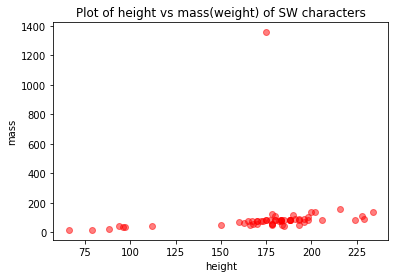

In [25]:
def plot_SW (int_list):
    height = [] 
    mass = []
    for i in range(0, len(int_list)):
        height.append(int_list[i][1])
        mass.append(int_list[i][2])
        
    plt.plot(height, mass, 'ro', alpha=0.5)
    plt.xlabel('height')
    plt.ylabel('mass')
    plt.title('Plot of height vs mass(weight) of SW characters')
    
plot_SW(list_e2)

----

**P3**: Write a function that takes as input a single integer $n$.  The function will generate $n$ random points in the plane, plot (i.e. a matplotlib plot) the points, and further plot one edge from each point to its nearest neighbour.  Include output from the $n=10$ case, and $n=100$ case.  As in the lecture notes, please use **%matplotlib inline** to ensure your plots are saved in your notebook.


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import sympy as sp
%matplotlib inline

In [27]:
def euclid_distance(node_in ,n):
    '''
    Calculate distance between each nodes
    Input: A numpy array full of nodes
    Output: A matrix of distance between nodes
    '''
    dist_Matrix = sp.zeros(n,n)
    for i in range(len(node_in)):
        for j in range(len(node_in)):
            if (i != j):
                dist_Matrix[i,j] = np.linalg.norm(node_in[i] - node_in[j])
    return dist_Matrix

In [48]:
def plot_points(n):
    '''
    # Algorithm:
    # Generate random n points in the x, y plane (not limit x and y limit to [-1,1] for simplicity)
    # Plot in the X, Y plane
    # Compare distance between points to find out the closest point
    # connect the two closest points
    # Profit?
    '''
    ## Set seed for reproducibility ##
    np.random.seed(12345)
    
    X = np.random.rand(n)
    Y = np.random.rand(n)
    node_list = list(zip(X,Y))
    node_arr = np.asarray(node_list)
    #print(node_arr)
    
    ## Call function euclid_distance to find euclidean distance betweeen nodes using numpy ##
    matrixA = euclid_distance(node_arr, n)
    #pp.pprint(matrixA[0,:])
    #print(len(X))
    
    ## Find shortest distance in each row, plot the edge if minimum ##
    for i in range(len(X)):
        for j in range(len(Y)):
            if (i != j) and (matrixA[i,j] == min(i for i in matrixA[i,:] if i > 0)):
                plt.plot( [X[i], X[j]], [Y[i], Y[j]], '-o', alpha = 0.5) 
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Plot with shortest edge')


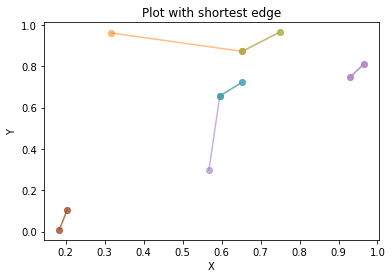

In [49]:
plot_points(10)

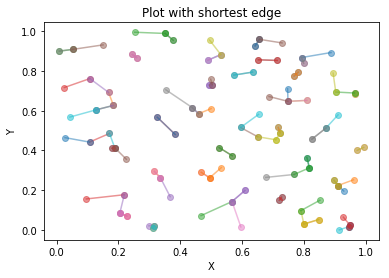

In [50]:
plot_points(100)

----
**P4:** In lecture 3c we created a plot of the complex roots of a family of polynomials.  The polynomial family was parametrized by a variable $t$

$$f_t(z) = z^2 + 3tz + 1$$

In this problem, we ask you to develop this idea further. 

Specifically, make the **same plot** as in class, but include line segments in this plot.  The rule for including line segments will be this.  Let $R_k$ be the roots of $f_{t_k}$ and $R_{k+1}$ be the roots of $f_{t_{k+1}}$ provided $t_k$ and $t_{k+1}$ are consecutive in the partition of the time interval $I$.  For every point of $R_k$ you will draw a line segment to **the closest** point(s) of $R_{k+1}$.  

Do your plots support the premise that if you vary the coefficients of a polynomial continuously, the roots would also *vary continuously*? 

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

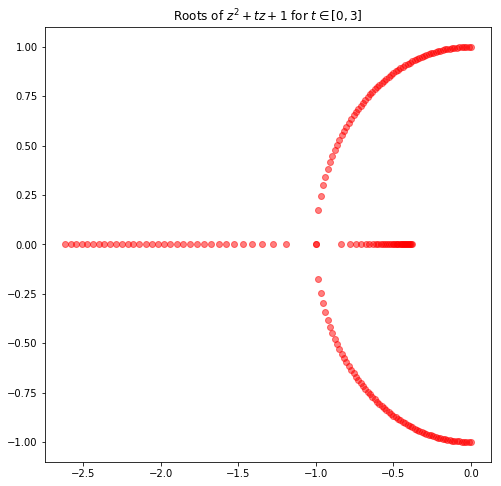

In [32]:
I = np.linspace(0.0, 1.0, 100)
plt.figure(figsize=(8,8))
plt.title("Roots of $z^2 + tz + 1$ for $t \in [0,3]$")
for t in I:
    R = np.roots([1.0, 3*t, 1.0])
    plt.plot([r.real for r in R], [r.imag for r in R], 'ro', alpha=0.5)

----

**P5:** In this problem we ask you to construct a variation on Simpson's method.   The set-up (context) is a little long, apologies!

The core idea of Simpson's method is described in the [Quadratic Interpolation](https://en.wikipedia.org/wiki/Simpson%27s_rule) section of the Wikipedia article.  In short, given the three points in the plane with three different x-coordinates, there is a unique quadratic polynomial that passes through those points.  The article even gives you the formula for the polynomial:

$$P(x) = f(a) \tfrac{(x-m)(x-b)}{(a-m)(a-b)} + f(m) \tfrac{(x-a)(x-b)}{(m-a)(m-b)} + f(b) \tfrac{(x-a)(x-m)}{(b-a)(b-m)}$$

Here $a<m<b$ are the three points on the x-axis and the three points in the plane are $(a,f(a)), (m, f(m)), (b, f(b))$. 

In Simpson's method, you break your interval $[a,b]$ into $n$ equal-length sub-intervals, on each sub-interval you compute the polynomial $P$ (but where $a$ and $b$ in the above formula would be replaced by the end-points of the sub-interval, $m$ being the mid-point).  The Simpson approximation is the sum of the integrals of the quadratic approximations, given by the above formula. 

In this problem we ask you to do something highly analogous, but we use a degree $3$ polynomial interpolation, rather than a degree $2$.  Specifically, if $f$ is differentiable function on an interval $[a,b]$ then we can find a unique degree $4$ polynomial $P(x)$ such that:

$$P(a) = f(a), P'(a) = f'(a), P(b) = f(b), P'(b) = f'(b)$$

Below we solve for the function $P$. 

#### Solving for P

The above four equations in $P$ can be viewed as a system of linear equations in the coefficients of the polynomial $P(x)=c_0+c_1x+c_2x^2+c_3x^3$. Linear algebra teaches us to write such a system of equations as a matrix equation:

$$\pmatrix{ 1 & a & a^2 & a^3 \\ 0 & 1 & 2a & 3a^2 \\ 1 & b & b^2 & b^3 \\ 0 & 1 & 2b & 3b^2} \pmatrix{c_0 \\ c_1 \\ c_2 \\ c_3} = \pmatrix{f(a) \\ f'(a) \\ f(b) \\ f'(b)}.$$

Call the $4\times 4$ matrix $A$.  The determinant of $A$ is $(a-b)^4$, so the inverse is given by:
$$A^{-1} = \frac{1}{det(A)} adj(A) = \frac{1}{(a-b)^4} [(-1)^{i+j} M_{ji}]$$
where $adj(A)$ is the *adjugate* of $A$, i.e. the transpose of the cofactor matrix $[(-1)^{i+j}M_{ij}]$.  This gives us the formula
$$A^{-1} = \frac{1}{(a-b)^3} \left[\begin{matrix}b^{2} \left(3 a - b\right) & a b^{2} \left(- a + b\right) & a^{2} \left(a - 3 b\right) & a^{2} b \left(- a + b\right)\\- 6 a b & b \left(2 a^{2} - a b - b^{2}\right) & 6 a b & a \left(a^{2} + a b - 2 b^{2}\right)\\3 a + 3 b & - a^{2} - a b + 2 b^{2} & - 3 a - 3 b & - 2 a^{2} + a b + b^{2}\\-2 & a - b & 2 & a - b\end{matrix}\right]$$
i.e. 

$$ \pmatrix{c_0 \\ c_1 \\ c_2 \\ c_3} = \frac{1}{(a-b)^3} \left[\begin{matrix}b^{2} \left(3 a - b\right) & a b^{2} \left(- a + b\right) & a^{2} \left(a - 3 b\right) & a^{2} b \left(- a + b\right)\\- 6 a b & b \left(2 a^{2} - a b - b^{2}\right) & 6 a b & a \left(a^{2} + a b - 2 b^{2}\right)\\3 a + 3 b & - a^{2} - a b + 2 b^{2} & - 3 a - 3 b & - 2 a^{2} + a b + b^{2}\\-2 & a - b & 2 & a - b\end{matrix}\right] \cdot \pmatrix{f(a) \\ f'(a) \\ f(b) \\ f'(b)}$$

### The problem:

In this problem we ask you to **use** the above formula to create an integral approximation technique. Call your function **deg3_approx**.  This function will take five arguments: (1) the function `f` you wish to approximate the integral of, (2) another function `fp` which is supposed to be the derivative of `f`, (3) the left-endpoint of the interval, (4) the right end-point of the interval and (5) the number of subdivisions to be performed. i.e. your function definition should look like this:

**def deg3_approx(f, fp, a, b, n):**

This function should return the sum of the integrals of the degree three approximations, outlined above, but where you perform the approximations on the $n$ equal-length sub-intervals of $[a,b]$. 

Once you have implemented this function, copy and paste these lines of code into your notebook, and execute.  The grading script for **Task 4** will check your answers.

```
for i in [2**k for k in range(2, 10)]:
    A = deg3_approx(np.sin, np.cos, 0.0, np.pi, i)
    print("Deg 3 with n=",i,' ',A, sep='')
```

How do the **deg3_approx** approximations compare with Simpson's approximations?